In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanIoU, AUC

import warnings
warnings.filterwarnings("ignore")

In [5]:
DIR = '/kaggle/input/bangladeshi-fish-species/Bangladeshi Fish Species Identification Dataset/Resized'
classes = [i for i in os.listdir(DIR) if '.' not in i]
classes

['Shorputi',
 'Foli',
 'Tengra',
 'KalBaush',
 'Pabda',
 'Aair',
 'Koi',
 'DeshiPuti',
 'Pangas',
 'Rui',
 'Magur',
 'Tarabaim',
 'Ilish',
 'Telapiya',
 'Puti',
 'Shol',
 'Taki',
 'Chapila',
 'Katla',
 'Boal',
 'Mrigel']

In [6]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.jpg':
            if dirname.split()[-1]!='GT':
                label.append(os.path.split(dirname)[-1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [7]:

df.head()

,path,label
0,/kaggle/input/bangladeshi-fish-species/Banglad...,Shorputi
1,/kaggle/input/bangladeshi-fish-species/Banglad...,Shorputi
2,/kaggle/input/bangladeshi-fish-species/Banglad...,Shorputi
3,/kaggle/input/bangladeshi-fish-species/Banglad...,Shorputi
4,/kaggle/input/bangladeshi-fish-species/Banglad...,Shorputi


In [8]:
df.path[0]

'/kaggle/input/bangladeshi-fish-species/Bangladeshi Fish Species Identification Dataset/Resized/Shorputi/Shorputi43.jpg'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27220 entries, 0 to 27219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    27220 non-null  object
 1   label   27220 non-null  object
dtypes: object(2)
memory usage: 425.4+ KB


In [10]:
df['label'].value_counts()

label
Rui          2726
Taki         2223
Telapiya     2058
Mrigel       1808
Aair         1804
Katla        1765
Pabda        1764
Boal         1651
Puti         1560
Tengra       1431
Shol         1424
Tarabaim     1262
Ilish        1031
Pangas        934
KalBaush      917
Koi           842
Magur         574
Foli          562
Chapila       428
DeshiPuti     412
Shorputi       44
Name: count, dtype: int64

ValueError: num must be an integer with 1 <= num <= 9, not 10

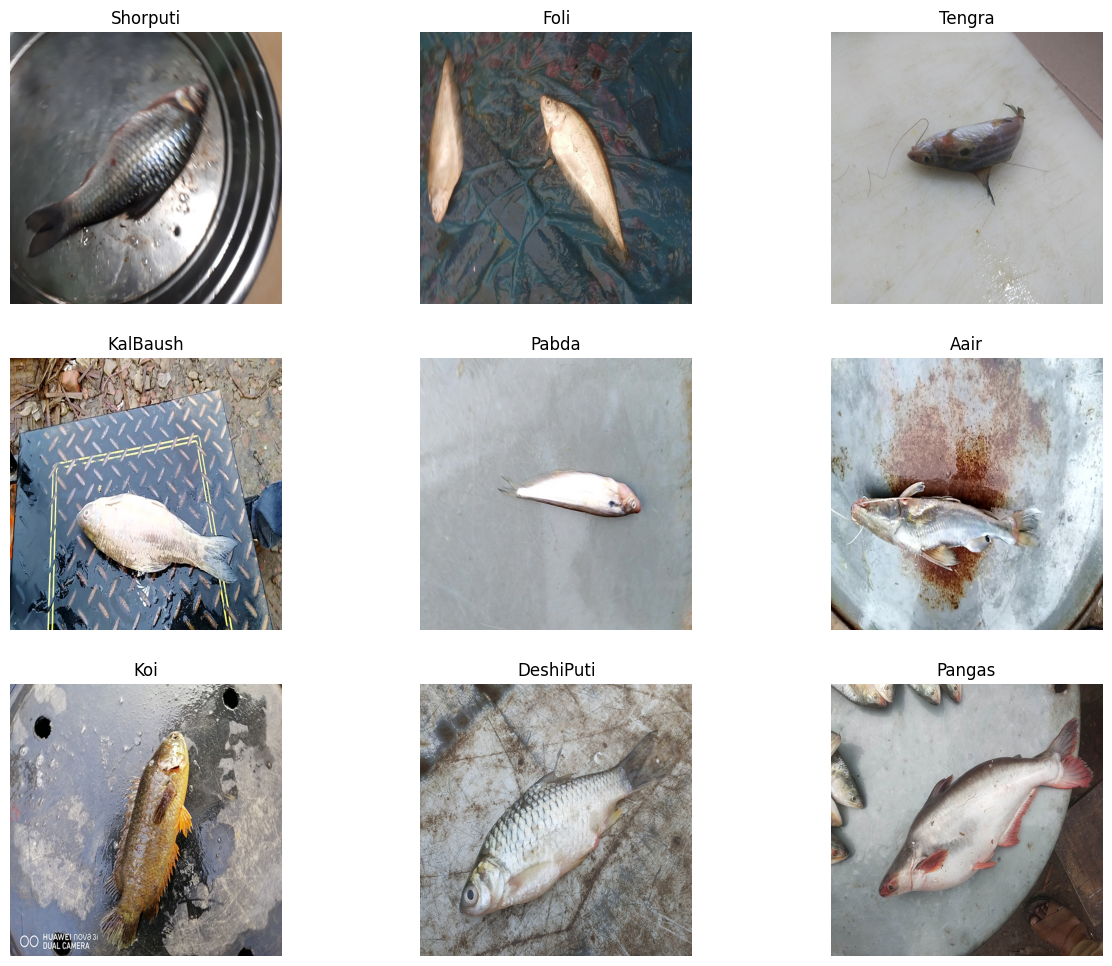

In [11]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [12]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [13]:
print(train_df.shape)
print(test_df.shape)

(21776, 2)
(5444, 2)


In [22]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False)

Found 17421 validated image filenames belonging to 21 classes.
Found 4355 validated image filenames belonging to 21 classes.
Found 5444 validated image filenames belonging to 21 classes.


In [23]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Aair': 0,
 'Boal': 1,
 'Chapila': 2,
 'DeshiPuti': 3,
 'Foli': 4,
 'Ilish': 5,
 'KalBaush': 6,
 'Katla': 7,
 'Koi': 8,
 'Magur': 9,
 'Mrigel': 10,
 'Pabda': 11,
 'Pangas': 12,
 'Puti': 13,
 'Rui': 14,
 'Shol': 15,
 'Shorputi': 16,
 'Taki': 17,
 'Tarabaim': 18,
 'Telapiya': 19,
 'Tengra': 20}

{'Aair': 0,
 'Boal': 1,
 'Chapila': 2,
 'DeshiPuti': 3,
 'Foli': 4,
 'Ilish': 5,
 'KalBaush': 6,
 'Katla': 7,
 'Koi': 8,
 'Magur': 9,
 'Mrigel': 10,
 'Pabda': 11,
 'Pangas': 12,
 'Puti': 13,
 'Rui': 14,
 'Shol': 15,
 'Shorputi': 16,
 'Taki': 17,
 'Tarabaim': 18,
 'Telapiya': 19,
 'Tengra': 20}

{'Aair': 0,
 'Boal': 1,
 'Chapila': 2,
 'DeshiPuti': 3,
 'Foli': 4,
 'Ilish': 5,
 'KalBaush': 6,
 'Katla': 7,
 'Koi': 8,
 'Magur': 9,
 'Mrigel': 10,
 'Pabda': 11,
 'Pangas': 12,
 'Puti': 13,
 'Rui': 14,
 'Shol': 15,
 'Shorputi': 16,
 'Taki': 17,
 'Tarabaim': 18,
 'Telapiya': 19,
 'Tengra': 20}

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

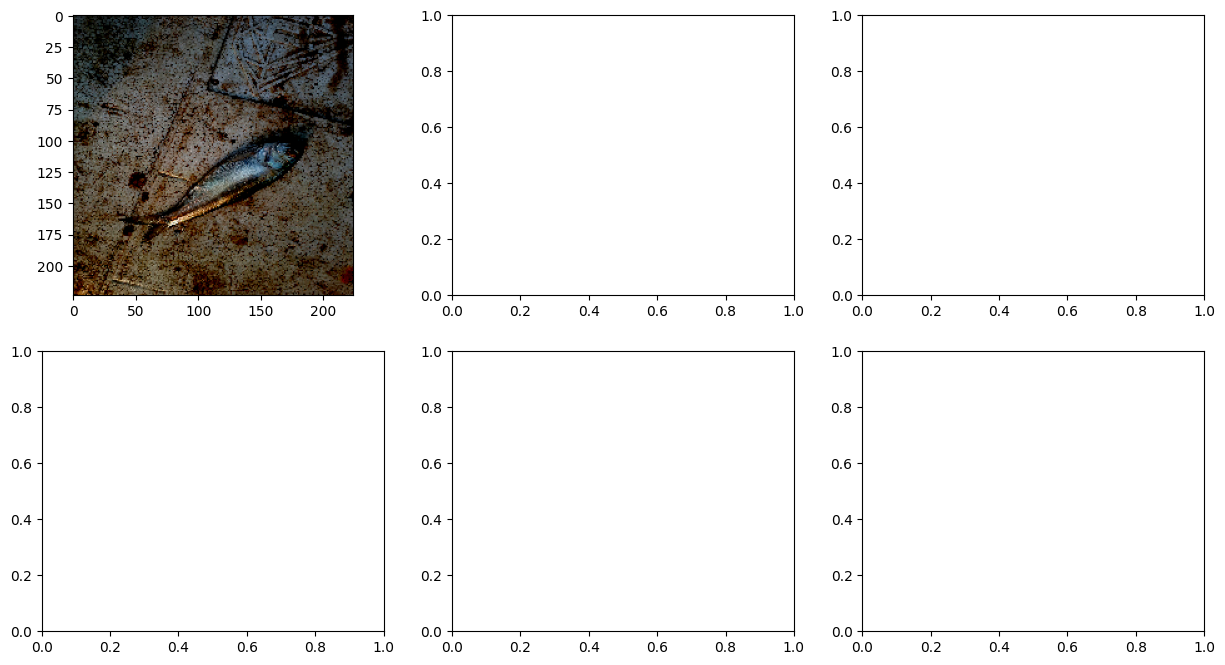

In [24]:
fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax = ax.flatten()

# Loop to display 6 images
for j in range(6):
    img, label = test_images.__getitem__(j)  # Access images and labels
    ax[j].imshow(img[0])
    ax[j].set_title(label[0])
plt.tight_layout()
plt.show()


In [25]:

# Load the ResNet50 model with pre-trained ImageNet weights
pretrained_model = ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [27]:
inputs = pretrained_model.input

# Define the custom top layers
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(21, activation='softmax')(x)  # Assuming 20 classes

# Compile the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=5
)

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,869,205 (91.05 MB)

 Trainable params: 281,493 (1.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 1878s 3s/step - accuracy: 0.1976 - loss: 2.5775 - val_accuracy: 0.3511 - val_loss: 2.0003
Epoch 2/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 1828s 3s/step - accuracy: 0.3836 - loss: 1.9318 - val_accuracy: 0.4599 - val_loss: 1.6628
Epoch 3/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 1888s 3s/step - accuracy: 0.4832 - loss: 1.6130 - val_accuracy: 0.5217 - val_loss: 1.4682
Epoch 4/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 1859s 3s/step - accuracy: 0.5567 - loss: 1.4019 - val_accuracy: 0.5713 - val_loss: 1.3299
Epoch 5/5
545/545 ━━━━━━━━━━━━━━━━━━━━ 1811s 3s/step - accuracy: 0.6065 - loss: 1.2308 - val_accuracy: 0.6168 - val_loss: 1.2016


In [28]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 1.23611
Test Accuracy: 60.32%


171/171 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step
Accuracy Score: 0.6032329169728141
              precision    recall  f1-score   support

        Aair       0.64      0.48      0.55       361
        Boal       0.86      0.64      0.73       333
     Chapila       0.42      0.78      0.55        83
   DeshiPuti       0.58      0.78      0.66        87
        Foli       0.65      0.54      0.59       108
       Ilish       0.60      0.66      0.63       185
    KalBaush       0.74      0.45      0.56       211
       Katla       0.86      0.66      0.74       344
         Koi       0.76      0.73      0.75       158
       Magur       0.61      0.42      0.49       110
      Mrigel       0.54      0.55      0.54       351
       Pabda       0.42      0.88      0.56       348
      Pangas       0.84      0.68      0.75       208
        Puti       0.79      0.58      0.67       284
         Rui       0.50      0.76      0.61       578
        Shol       0.70      0.54      0.61       278
    

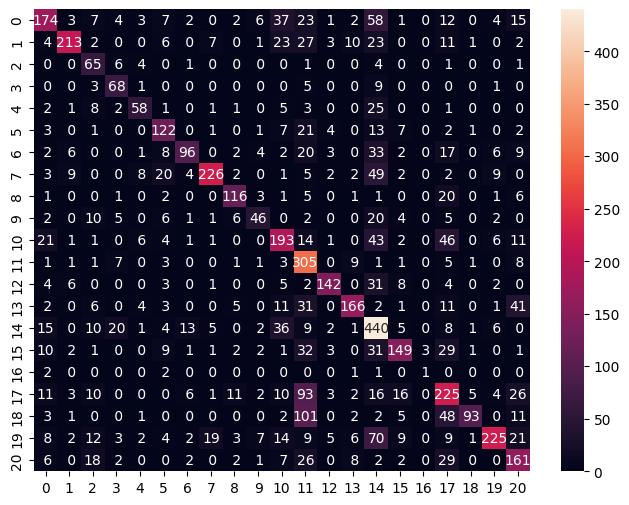

In [29]:
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)
pred_df = test_df.copy()
labels = {v: k for k, v in test_images.class_indices.items()}
pred_df['pred'] = pred
pred_df['pred'] = pred_df['pred'].apply(lambda x: labels[x])

print(f"Accuracy Score: {accuracy_score(pred_df['label'], pred_df['pred'])}")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(pred_df['label'], pred_df['pred']), annot=True, fmt='2d')
print(classification_report(pred_df['label'], pred_df['pred']))

In [1]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

# Check if 'accuracy' and 'val_accuracy' are available in the history (depends on Keras version)
if 'accuracy' in history.history and 'val_accuracy' in history.history:
    # Plot training & validation accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

# Check if 'loss' and 'val_loss' are available in the history
if 'loss' in history.history and 'val_loss' in history.history:
    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'history' is not defined